## COVID-19: Computational Drug Discovery [Comparing Regressors][Part 5]

This an attempt to find an FDA approved compound or molecule that will inhibit the function of Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV2).
In Part 5, we will be comparing several ML algorithms for building regression models of replicase polyprotein 1ab inhibitors.


An Otsogile Onalepelo Project aka Morena!

### import required packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

C:\Users\onale\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load the dataset

In [2]:
df = pd.read_csv('replicase_polyprotein_1ab_bioactivity_data_2class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.41
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.68
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.10
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.80
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.36
106,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.91
107,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.30
108,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12


In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

### Data pre-processing

In [4]:
# Examine X dimension
X.shape

(110, 881)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(110, 176)

In [6]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Compare ML algorithms

In [7]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:46<00:00,  1.11s/it]


In [8]:
# Models Performance table
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,17924830530819018597145881065398118356117402523...,-1323023205846165516381985420849691775246068638...,74920243838547077364488961901234234060701696.00,0.22
TransformedTargetRegressor,35837354144978780028928.00,-264513804403414772219904.00,334996000626.04,0.05
LinearRegression,35837354144978780028928.00,-264513804403414772219904.00,334996000626.04,0.04
KernelRidge,13.51,-91.36,6.26,0.04
GaussianProcessRegressor,11.71,-78.08,5.79,0.04
MLPRegressor,1.55,-3.07,1.31,0.67
DecisionTreeRegressor,1.28,-1.07,0.94,0.02
ExtraTreesRegressor,1.24,-0.77,0.87,0.51
ExtraTreeRegressor,1.23,-0.69,0.85,0.05


### Data visualization of model performance

[(0, 1)]

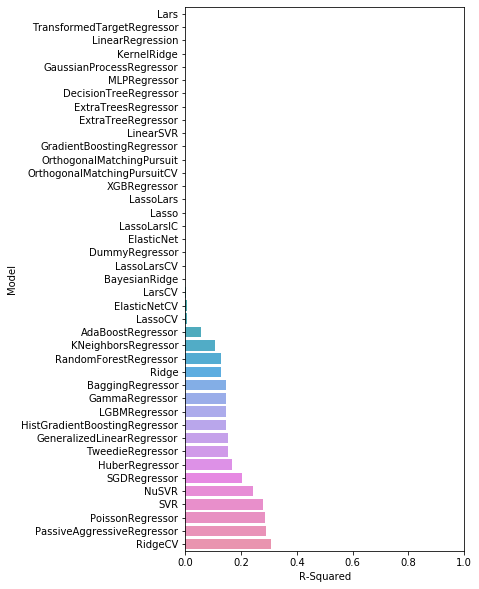

In [9]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

[(0, 10)]

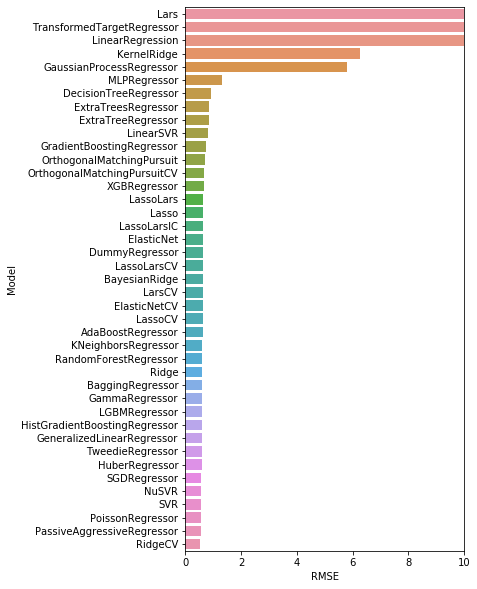

In [10]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=predictions.index, x="RMSE", data=predictions)
ax.set(xlim=(0, 10))

[(0, 10)]

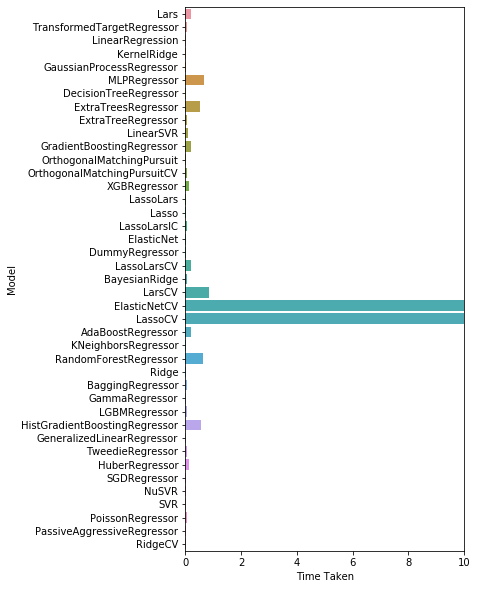

In [11]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=predictions.index, x="Time Taken", data=predictions)
ax.set(xlim=(0, 10))